# ロジスティック回帰
ロジスティック回帰は、説明変数から2値の目的変数を予測するモデルである。(例えば、単位数と出席率から留年する(Y/N)を予測する) したがって、「回帰」という名前が付いてはいるが、回帰問題ではなく分類問題を解くモデルである。

今回は、ワインの品質が良いか否かを説明変数とする。quality が6以上をgood, それ以外をbadとしよう。

In [1]:
import pandas as pd
import numpy as np
wine = pd.read_csv("winequality-red.csv",sep=";")

In [2]:
wine["quality"] = (wine["quality"] >= 6)

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,False


まず説明変数が1つだけの簡単なケースから。

In [4]:
vars = ['chlorides']
X = wine[vars].values # 説明変数 (1つだけ)
t = wine['quality'] # 目的変数 (0 or 1。False なら 0, True なら 1)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

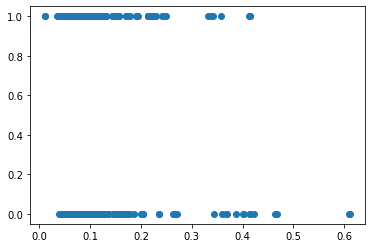

In [6]:
plt.scatter(X,t)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.1, random_state=0)

ロジスティック回帰モデルは、線形予測子 $z$ およびロジスティック関数 $\sigma(z)$ により以下のように書くことができる。
\begin{align*}
z&=\sum_{i=0}^m w_ix_i=\boldsymbol{w}^\top\boldsymbol{x} \\
y&=\sigma(z)=\frac{1}{1+\exp(-z)}
\end{align*}

ロジスティック関数は、定義域が $(-\infty,\infty)$, 値域が $(0,1)$ の関数である(下図)。

In [8]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

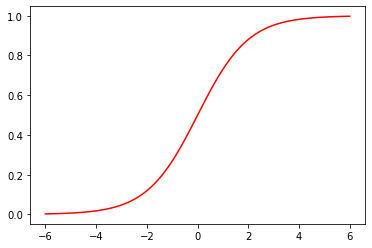

In [9]:
z = np.linspace(-6.0,6.0,100)
plt.plot(z, logistic(z), color='red')

## scikit-learnを利用してロジスティック回帰モデルを求める

In [10]:
from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
logreg = LogisticRegression(solver='liblinear') # scikit-learn bug workaround
logreg.fit(X_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
logreg.coef_[0]

array([-2.11529209])

In [12]:
logreg.intercept_[0]

0.3136763732534618

Text(0.5, 0, 'x')

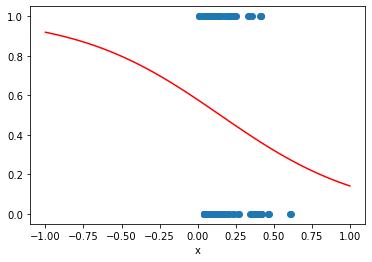

In [13]:
plt.scatter(X_train, t_train)
X_plot = np.linspace(-1.0,1.0,100)
y_plot = logistic(X_plot * logreg.coef_[0] + logreg.intercept_[0])
plt.plot(X_plot, y_plot, color='red')
plt.xlabel('x')

テストデータに対する正解率は、scikit-learn の LogisticRegression の [score メソッド](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score)で求められる。

In [14]:
logreg.score(X_test,t_test)

0.55625

次に、quality以外の全ての変数を説明変数としてモデルを作ってみる。

In [15]:
X = wine.drop('quality', axis=1).values # 説明変数 (quality以外全部)
t = wine['quality'] # 目的変数
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.1, random_state=0)
K_train = X_train.shape[0]
K_test = X_test.shape[0]

In [16]:
logreg.fit(X_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
np.insert(logreg.coef_[0],0,logreg.intercept_)

array([-1.31387945, -0.00989411, -2.86359862, -0.65776911,  0.03078313,
       -1.61604355,  0.02071799, -0.01688759, -1.30734921, -1.52069523,
        1.87544191,  0.85766944])

Text(0.5, 0, 'z')

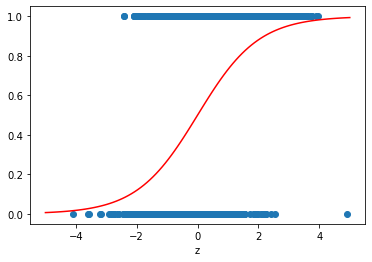

In [18]:
X_train_a = np.column_stack((np.ones(K_train),X_train))
w = np.insert(logreg.coef_[0],0,logreg.intercept_)
z = w.dot(X_train_a.T)
plt.scatter(z, t_train)
X_plot = np.linspace(-5.0,5.0,100)
y_plot = logistic(X_plot)
plt.plot(X_plot, y_plot, color='red')
plt.xlabel('z')

In [19]:
logreg.score(X_test,t_test)

0.76875

## ロジスティック回帰の損失関数
ロジスティック回帰においても線形回帰と同様に誤差二乗和で損失関数を定義してもよいのだが、ふつうはそうしない。もっと自然な損失関数がある。では、どんな損失関数を使うのが自然だろうか。

ロジスティック回帰の予測値 $y$ は0から1までの値を取るので、これを「ワインの品質がgood (=1) である確率」と解釈すると、説明変数 $\boldsymbol{x}$ によってロジスティック回帰モデルで予測される、ワインの品質がgoodである確率 $P(t=1|\boldsymbol{w})$ およびbadである確率 $P(t=0|\boldsymbol{w})$ は
\begin{align}
P(t=1|\boldsymbol{w})&=y=\frac{1}{1+\exp(-\boldsymbol{w}^\top\boldsymbol{x})} \\
P(t=0|\boldsymbol{w})&=1-y=1-\frac{1}{1+\exp(-\boldsymbol{w}^\top\boldsymbol{x})}
\end{align}
となる。この式を1つにまとめて書くと
$$P(t|\boldsymbol{w})=y^t(1-y)^{1-t}$$
となる。この $P$ は $\boldsymbol{w}$ に関する条件付確率になっている。モデルパラメータが変われば $P$ の値も変わるからである。

データセット $\boldsymbol{\mathsf{X}}=(\boldsymbol{x}_1 \boldsymbol{x}_2 \cdots)$,
$\boldsymbol{\mathsf{t}}=(t_1 t_2 \cdots)$ に対し、 $\boldsymbol{x}_1, \boldsymbol{x}_2 \cdots$ のそれぞれが $t_1, t_2 \cdots$ になる同時確率は、それぞれの確率の積になるから
$$P(\boldsymbol{\mathsf{t}}|\boldsymbol{w})=\prod_k y_k^{t_k}(1-y_k)^{1-t_k}$$
となる。

この同時確率を $\boldsymbol{w}$ の関数とみなす。これを尤度関数という。尤度関数が大きいモデルの方が「それっぽい」モデルなので、世の中の統計的推測では多くの場合尤度関数をできるだけ大きくするようにパラメータを推測する。尤度関数が最大のとき、その対数も最大になる。そこで、ロジスティック回帰の損失関数を、負の対数尤度で定義しよう。すると
\begin{equation}
E=-\ln P(\boldsymbol{\mathsf{t}}|\boldsymbol{w})=-\sum_k \{t_k \ln y_k + (1-t_k) \ln(1-y_k)\}
\end{equation}
となる。この損失関数を交差エントロピーという。

In [20]:
def BinaryCrossEntropy(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) - np.sum((1 - t) * np.log((1 - y) + delta))

In [21]:
X_test_a = np.column_stack((np.ones(K_test),X_test))
w = np.insert(logreg.coef_[0],0,logreg.intercept_)
z = w.dot(X_test_a.T)
y_test = logistic(z)
BinaryCrossEntropy(y_test, t_test)

78.21888833237459

もし $\boldsymbol{w}$ をランダムな値とすると

In [22]:
w = np.random.rand(w.size)
w

array([0.13344189, 0.93174506, 0.69635825, 0.91845695, 0.5239719 ,
       0.9792261 , 0.67925338, 0.52829866, 0.15213306, 0.66229315,
       0.8292623 , 0.24004555])

In [23]:
z = w.dot(X_test_a.T)
y_test = logistic(z)
BinaryCrossEntropy(y_test, t_test)

1144.3751507050679

# 課題
1. ロジスティック関数 $\sigma(z)$ の導関数を求めよ。
1. 説明変数が1つのとき、ロジスティック回帰モデルの損失関数 $E$ の $w_0$ および $w_1$ による偏微分を求めよ。
1. ロジスティック回帰モデルの損失関数 $E$ を最小にするモデルパラメータは解析的には求まらない。このことを確認せよ。
1. 数値微分と勾配法によってモデルパラメータを求めよ。